**Task 1**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings

# ignore failed to converge warnings
warnings.filterwarnings("ignore")
  
# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)



In [2]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

clf = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(clf, Xtrain, Ytrain)
scores.mean()


0.7805882352941176

In [4]:
# Tree based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from itertools import product



def grid_search(model_class, param_grid, X, y):
    """Helper function to perform grid search on the given model class."""
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())

    best_params = None
    best_score = float('-inf')

    for param_combination in product(*param_values):
        param_set = dict(zip(param_names, param_combination))
        clf = model_class(**param_set)

        mean_score = cross_val_score(clf, X, y).mean()

        if mean_score > best_score:
            best_params = param_set
            best_score = mean_score

    return best_params, best_score
    
tree_params = {"max_depth": range(1, 30)}

# DecisionTreeClassifier
best_params, best_score = grid_search(DecisionTreeClassifier, tree_params, Xtrain, Ytrain)
print(f"DecisionTreeClassifier: best_score = {best_score} with best_params = {best_params}")

# RandomForestClassifier
best_params, best_score = grid_search(RandomForestClassifier, tree_params, Xtrain, Ytrain)
print(f"RandomForestClassifier: best_score = {best_score} with best_params = {best_params}")



tree_params = {"max_depth": range(1, 10), "n_estimators": [100, 150, 200]}
# GradientBoostingClassifier
best_params, best_score = grid_search(GradientBoostingClassifier, tree_params, Xtrain, Ytrain)
print(f"GradientBoostingClassifier: best_score = {best_score} with best_params = {best_params}")




DecisionTreeClassifier: best_score = 0.9358823529411764 with best_params = {'max_depth': 7}
RandomForestClassifier: best_score = 0.9429411764705883 with best_params = {'max_depth': 13}
GradientBoostingClassifier: best_score = 0.9535294117647058 with best_params = {'max_depth': 4, 'n_estimators': 200}


In [5]:
# Linear

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

linear_params = {"tol": [1e-2, 1e-3, 1e-4, 1e-5], "max_iter": [2000]}

# Perceptron
best_params, best_score = grid_search(Perceptron, linear_params, Xtrain, Ytrain)
print(f"Perceptron: best_score = {best_score} with best_params = {best_params}")

# LinearSVC
best_params, best_score = grid_search(LinearSVC, linear_params, Xtrain, Ytrain)
print(f"LinearSVC: best_score = {best_score} with best_params = {best_params}")


linear_params = {"tol": [1e-2, 1e-3, 1e-4, 1e-5], "max_iter": [2000], "solver": ["liblinear"]}
# LogisticRegression
best_params, best_score = grid_search(LogisticRegression, linear_params, Xtrain, Ytrain)
print(f"LogisticRegression: best_score = {best_score} with best_params = {best_params}")




Perceptron: best_score = 0.825294117647059 with best_params = {'tol': 0.01, 'max_iter': 2000}
LinearSVC: best_score = 0.8658823529411765 with best_params = {'tol': 0.01, 'max_iter': 2000}
LogisticRegression: best_score = 0.8941176470588236 with best_params = {'tol': 1e-05, 'max_iter': 2000, 'solver': 'liblinear'}


In [6]:
from sklearn.neural_network import MLPClassifier

mlp_params = {"hidden_layer_sizes": [(100,), (100, 100), (100, 100, 100)],
              "max_iter": [300],
              "learning_rate_init": [1e-3, 1e-4]}
# MLPClassifier
best_params, best_score = grid_search(MLPClassifier, mlp_params, Xtrain, Ytrain)
print(f"MLPClassifier: best_score = {best_score} with best_params = {best_params}")




MLPClassifier: best_score = 0.8947058823529412 with best_params = {'hidden_layer_sizes': (100, 100, 100), 'max_iter': 300, 'learning_rate_init': 0.0001}


In [7]:
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=6)

clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9342723004694836


**Answer** 

The chosen classifier is the GradientBoostingClassifier which is a powerful and flexible machine learning tool for classification tasks. It leverages the strengths of multiple decision trees and sequentially corrects errors.

The accuracy score found with this classifier was approximately 0.93 with a max depth of 6 with 100 estimators.


**Task 2**

In [94]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
        
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id


from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))

        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass
    
    

from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [9]:
tree_params = {"max_depth": range(1, 30)}
best_params, best_score = grid_search(TreeClassifier, tree_params, Xtrain, Ytrain)
print(f"TreeClassifier: best_score = {best_score} with best_params = {best_params}")

TreeClassifier: best_score = 0.9135294117647058 with best_params = {'max_depth': 13}


In [10]:
cls = TreeClassifier(max_depth=13)
cls.fit(Xtrain, Ytrain)
Yguess = cls.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.8732394366197183


**Answer**

Based on the cross validation score we chose 13 as the depth and got an accuracy of approximately 0.87 on the test set. Below is a tree, trained on the data with a maximum depth of 3 for visualization.

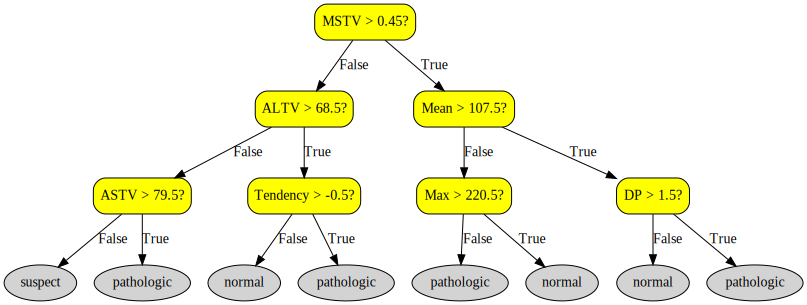

In [11]:
cls = TreeClassifier(max_depth=3)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

In [66]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
from sklearn.model_selection import cross_validate
from itertools import product
def grid_search_regression(model_class, param_grid, X, y):
    """Helper function to perform grid search on the given model class."""
    param_names = list(param_grid.keys())
    param_values = list(param_grid.values())

    best_params = None
    best_score = float('-inf')

    for param_combination in product(*param_values):
        param_set = dict(zip(param_names, param_combination))
        clf = model_class(**param_set)

        mean_score = cross_validate(clf, X, y, scoring="neg_mean_squared_error")["test_score"].mean()

        if mean_score > best_score:
            best_params = param_set
            best_score = mean_score

    return best_params, best_score

In [14]:
from sklearn.dummy import DummyRegressor
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00259876, 0.00199819, 0.0009954 , 0.00234032, 0.00199986]),
 'score_time': array([0.0010016 , 0.        , 0.00150275, 0.00131059, 0.00099754]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

tree_params = {"max_depth": range(1, 20)}

# DecisionTreeRegressor
best_params, best_score = grid_search_regression(DecisionTreeRegressor, tree_params, Xtrain, Ytrain)
print(f"DecisionTreeRegressor: best_score = {best_score} with best_params = {best_params}")

# RandomForestRegressor
best_params, best_score = grid_search_regression(RandomForestRegressor, tree_params, Xtrain, Ytrain)
print(f"RandomForestRegressor: best_score = {best_score} with best_params = {best_params}")

tree_params = {"max_depth": range(1, 8), "n_estimators": [100, 200, 500, 1000]}
# GradientBoostingRegressor
best_params, best_score = grid_search_regression(GradientBoostingRegressor, tree_params, Xtrain, Ytrain)
print(f"GradientBoostingRegressor: best_score = {best_score} with best_params = {best_params}")

DecisionTreeRegressor: best_score = -0.28044296310461403 with best_params = {'max_depth': 6}
RandomForestRegressor: best_score = -0.26562901898155 with best_params = {'max_depth': 10}
GradientBoostingRegressor: best_score = -0.25458344698290103 with best_params = {'max_depth': 3, 'n_estimators': 500}


In [16]:
# Linear
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate


# LinearRegression
clf = LinearRegression()
mean_score = cross_validate(clf, Xtrain, Ytrain, scoring="neg_mean_squared_error")["test_score"].mean()

print(f"LinearRegression: mean_score = {mean_score}")

linear_params = {"tol": [1e-2, 1e-3, 1e-4], "max_iter": [2000]}
# Ridge
best_params, best_score = grid_search_regression(Ridge, linear_params, Xtrain, Ytrain)
print(f"Ridge: best_score = {best_score} with best_params = {best_params}")

# Lasso
best_params, best_score = grid_search_regression(Lasso, linear_params, Xtrain, Ytrain)
print(f"Lasso: best_score = {best_score} with best_params = {best_params}")


LinearRegression: mean_score = -0.3013986588767211
Ridge: best_score = -0.3013978423217976 with best_params = {'tol': 0.01, 'max_iter': 2000}
Lasso: best_score = -0.30104706717488716 with best_params = {'tol': 0.0001, 'max_iter': 2000}


In [17]:
from sklearn.neural_network import MLPRegressor

# MLPRegressor
mlp_params = {"hidden_layer_sizes": [(100,), (100, 100), (100, 100, 100)],
              "max_iter": [300],
              "learning_rate_init": [1e-3, 1e-4]}
best_params, best_score = grid_search_regression(MLPRegressor, mlp_params, Xtrain, Ytrain)
print(f"MLPRegressor: best_score = {best_score} with best_params = {best_params}")

MLPRegressor: best_score = -112.15243346985994 with best_params = {'hidden_layer_sizes': (100,), 'max_iter': 300, 'learning_rate_init': 0.0001}


In [18]:
from sklearn.metrics import mean_squared_error
  
regr = GradientBoostingRegressor(random_state=0, n_estimators=500, max_depth=3)
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.26035890207950113

**Answer**

Based on the results from the cross validation, GradientBoostingRegressor was the best model, with a max depth of 3 and n_estimators of 500 and got a mean squared error of 0.26 on the test set. It is a machine learning model that uses gradient boosting to make predictions, and works by sequentially adding predictors to an ensembe, where each one is correcting its predecessor.

**Task 4**

In [95]:
from sklearn.base import RegressorMixin
class TreeRegressor(DecisionTree, RegressorMixin):
    def __init__(self, max_depth=10, variance_threshold=1e-5):
        super().__init__(max_depth)
        self.variance_threshold = variance_threshold
        
    def fit(self, X, Y):
        # The criterion for regression is variance reduction which means
        # no criterion functions like in classification.
        super().fit(X, Y)

    # For regression trees, the default value is the mean of the Y values
    # in the node.
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # For regression, a node is considered homogeneous if the variance
    # of the Y values is below a certain threshold.
    # Instead of checking for a single unique class, 
    # check if the variance of Y is below the threshold.
    def is_homogeneous(self, Y):
       return np.var(Y) < self.variance_threshold
        
    # Finds the best splitting point for a given feature. Unlike in classification,
    # we use variance reduction to determine the best split.
    # The process is to go through all the sorted values of the feature and evaluate
    # the variance reduction at each possible split point.
    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Initialize sums for variance calculation.
        low_sum, low_sq_sum = 0, 0
        high_sum, high_sq_sum = np.sum(Y_sorted), np.sum(np.array(Y_sorted)**2)

        best_variance_reduction = -np.inf
        best_split_point = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            y_i = Y_sorted[i]
            low_sum += y_i
            low_sq_sum += y_i**2
            high_sum -= y_i
            high_sq_sum -= y_i**2

            # If the next value is the same, we do not consider a split here.
            if X_sorted[i] == X_sorted[i + 1]:
                continue

            # Compute the variance for both partitions and the variance reduction.
            low_variance = low_sq_sum / (i + 1) - (low_sum / (i + 1))**2
            high_variance = high_sq_sum / (n - i - 1) - (high_sum / (n - i - 1))**2
            total_variance = high_sq_sum / n - (high_sum / n)**2

            variance_reduction = total_variance - (n - i - 1) / n * high_variance - (i + 1) / n * low_variance

            # If this split yields a better variance reduction, remember it.
            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_split_point = (X_sorted[i] + X_sorted[i + 1]) / 2

        # If no split point was found (meaning all values for this feature are the same),
        # we return None to indicate no split can be made.
        if best_split_point is None:
            return -np.inf, None, None

        # Otherwise, we return the best split point and its associated variance reduction.
        return best_variance_reduction, feature, best_split_point


In [55]:
# Sanity check
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

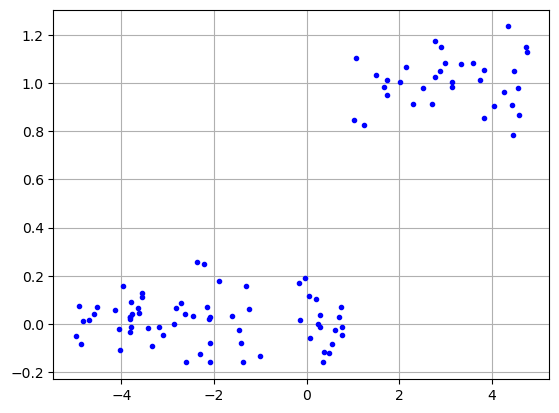

In [62]:
from matplotlib import pyplot as plt
import numpy as np
X, Y = make_some_data(100)
plt.plot(X,Y,'b.')
plt.grid('True')

In [63]:
tree_params = {"max_depth": range(1, 20)}
grid_search_regression(TreeRegressor, tree_params, X, Y)

({'max_depth': 1}, -0.010369720076699084)

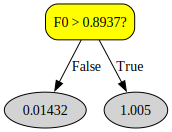

In [64]:
reg = TreeRegressor(max_depth=1)
reg.fit(X, Y)
reg.draw_tree()

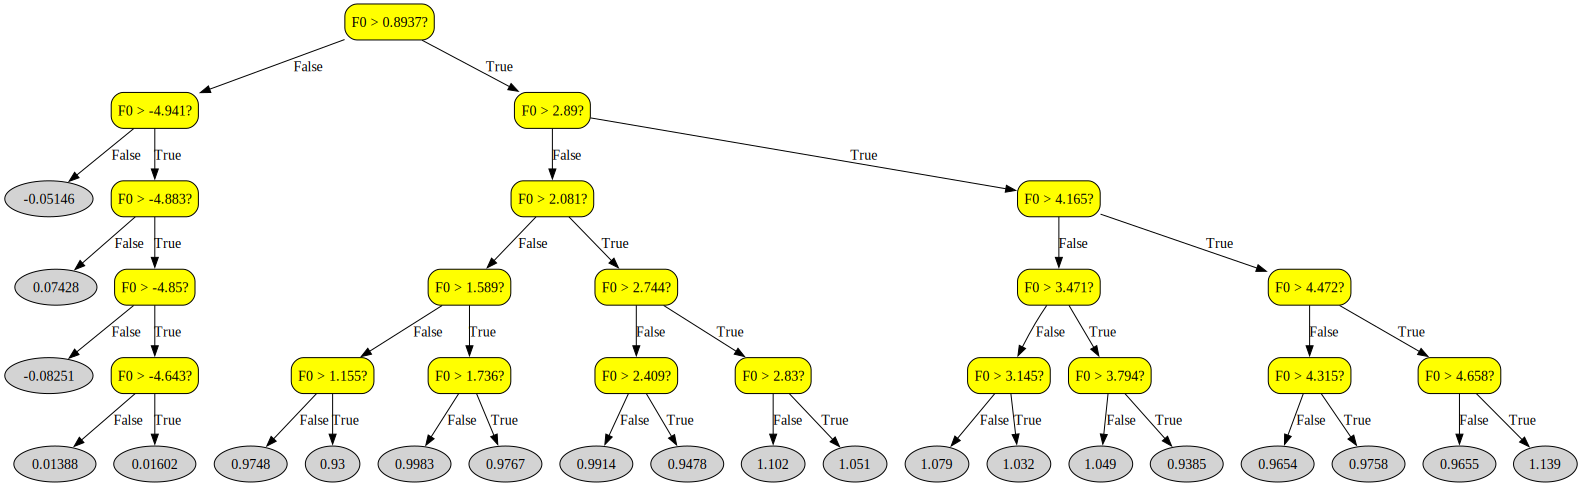

In [65]:
reg = TreeRegressor(max_depth=5)
reg.fit(X, Y)
reg.draw_tree()

**Answer**
- If you consider the data-generating function, what kind of decision tree would we want to describe this data?

The kind of decision tree that describes the data is a regression tree, because of the continuous output variables of Y. If the line Y = (x > 1) + 0.1*np.random.normal(size=n), it would be a classification task as it would have two classes (1 and 2).

- Does the result make sense? What happens if we allow the tree depth to be a large number?

Yes the result makes sense, as it seperates the outputs into two leaf nodes. If we allow the tree depth to be large, it clearly overfits to the data and makes much less sense.



**Step 3. Predicting apartment prices using decision tree regression**

In [67]:
tree_params = {"max_depth": range(1, 20)}
grid_search_regression(TreeRegressor, tree_params, Xtrain, Ytrain)

({'max_depth': 5}, -0.29401092290304665)

In [69]:
from sklearn.metrics import mean_squared_error

regr = TreeRegressor(max_depth=5)
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.3020609090171759

**Answer**

After running grid search for different max depths, using cross validation, the optimal max depth was 5 and the resulting mean squared error on the test set was 0.3.

**Step 4. Underfitting and overfitting**

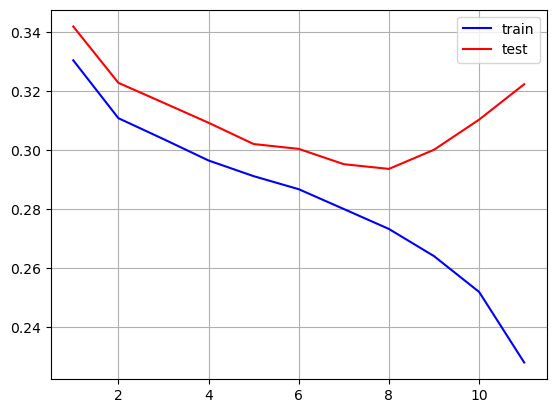

In [101]:
pred_test_values = []
pred_train_values = []
for max_depth in range(1, 12):
    regr = TreeRegressor(max_depth=max_depth)
    regr.fit(Xtrain, Ytrain)
    pred_train_values.append(mean_squared_error(Ytrain, regr.predict(Xtrain)))
    pred_test_values.append(mean_squared_error(Ytest, regr.predict(Xtest)))

x = range(1, 12)
plt.plot(x, pred_train_values, 'b', label='train')
plt.plot(x, pred_test_values, 'r', label='test')
plt.grid('True')
plt.legend()

**Answer**

As can be seen in the plot above, the evaluation score for both test and train datasets decrease until the max depth of the tree is 8. The tree then clearly overfits to the training data and the train evaluation score is approaching 0 while the test score is increasing. The reason is that the tree has picked up the patterns in the training data very well, but has not generalized and thus becomes worse at predicting unseen values.